# discretization

In [1]:
import pandas as pd 
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
df=pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.shape

(714, 3)

In [11]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [12]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [14]:
x_train.head(2)

,Age,Fare
37,21.0,8.05
58,5.0,27.75


In [15]:
clf=DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6046511627906976

In [17]:
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

np.float64(0.6288732394366197)

In [18]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [19]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [20]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [21]:
trf.named_transformers_['first'].n_bins_

array([10])

In [22]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.     ,   7.75   ,   7.8958 ,   9.09   ,  13.     ,  15.9    ,
               26.     ,  30.     ,  52.     ,  83.22164, 263.     ])          ],
      dtype=object)

In [23]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [24]:
output

,age,age_trf,fare,fare_trf
37,21.0,2.0,8.0500,2.0
58,5.0,0.0,27.7500,6.0
57,28.5,4.0,7.2292,0.0
94,59.0,9.0,7.2500,0.0
209,40.0,7.0,31.0000,7.0
...,...,...,...,...
92,46.0,8.0,61.1750,8.0
134,25.0,4.0,13.0000,4.0
337,41.0,7.0,134.5000,9.0
548,33.0,6.0,20.5250,5.0


In [25]:
output['age_labels']=pd.cut(x=x_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [26]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
37,21.0,2.0,8.0500,2.0,"(19.0, 22.0]","(7.896, 9.09]"
58,5.0,0.0,27.7500,6.0,"(0.67, 14.0]","(26.0, 30.0]"
57,28.5,4.0,7.2292,0.0,"(25.0, 29.0]","(0.0, 7.75]"
94,59.0,9.0,7.2500,0.0,"(50.0, 80.0]","(0.0, 7.75]"
209,40.0,7.0,31.0000,7.0,"(36.0, 42.0]","(30.0, 52.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(52.0, 83.222]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.09, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(83.222, 263.0]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.9, 26.0]"


In [27]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred_1=clf.predict(x_test_trf)
accuracy_score(y_pred_1,y_test)

0.627906976744186

In [28]:
x_trf=trf.fit_transform(x)
np.mean(cross_val_score(clf,x_trf,y,scoring='accuracy',cv=10))

np.float64(0.682140062597809)

In [29]:
# function created below

In [30]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    x_trf=trf.fit_transform(x)
    print(np.mean(cross_val_score(clf,x_trf,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,5))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('after')

    plt.show()

0.6584702660406886


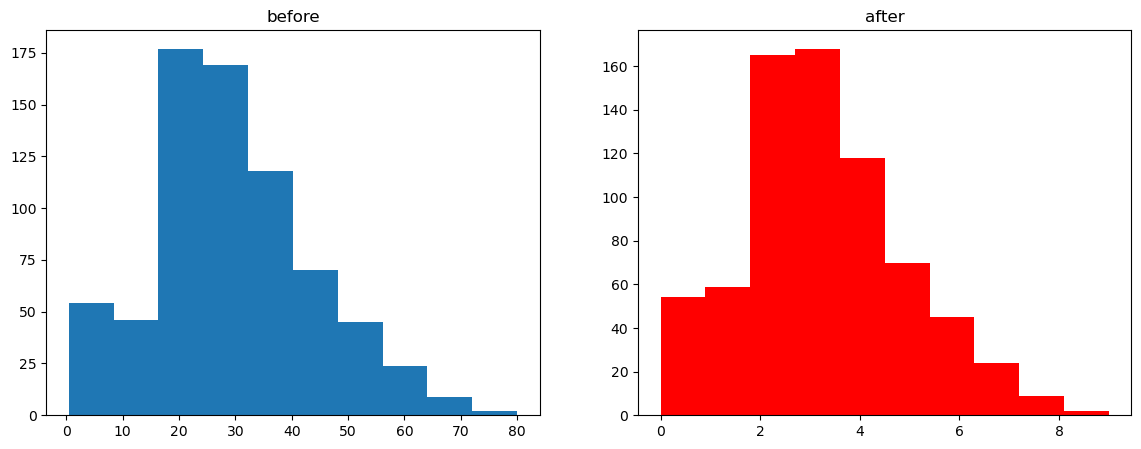

In [31]:
discretize(10,'kmeans')  #uniform,quantile